In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
happiness2015 = pd.read_csv('2015.csv')
first_5 = happiness2015[0:5]
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
first_5

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In this mission, we'll learn how to perform different kinds of aggregations, applying a statistical operation to groups of our data, and create visualizations like the one above.

Recall that in the Pandas Fundamentals course, we learned a way to use loops for aggregation. Our process looked like this:

    Identify each unique group in the data set.
    For each group:
        Select only the rows corresponding to that group.
        Calculate the average for those rows.

Let's use the same process to find the mean happiness score for each region.

In [9]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    region_group = happiness2015[happiness2015['Region'] == r] #we can repalce this with a groupby object
    region_mean = region_group['Happiness Score'].mean()
    mean_happiness[r] = region_mean

In [17]:
happiness2015[happiness2015['Region'] == "North America"] #this can be replaced by groupby object

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


<h4>Use the groupby method df.groupby() can put in column or even group by a list to pass into. When thinking about what columns to use, 
look at columns with the same value for multiple rows. 

In [19]:
happiness2015['Region'].value_counts() #region column looks good to use having multiple values for each region and not a tonne of regions vs countries

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [23]:
#createa groupby object 
happiness2015.groupby('Region')
print(happiness2015.groupby('Region'))

In [24]:
group = happiness2015.groupby('Region')
group.get_group("North America")

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [26]:
grouped = happiness2015.groupby("Region")
aus_nz = grouped.get_group("Australia and New Zealand")
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [28]:
#can see it passes dictionary with the countries index in the original df
grouped = happiness2015.groupby('Region')
grouped.groups

{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}

In [29]:
grouped = happiness2015.groupby('Region')
north_america = happiness2015.iloc[[4,14]]
na_group = grouped.get_group('North America')
equal = north_america == na_group

In [30]:
#we can see how many rows are in each group
grouped = happiness2015.groupby('Region')
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

Pandas has built in a number of other common aggregation methods:
Methods 	Description
<ol type="a">
  <li>mean() 	Calculates the mean of groups.</li>
  <li>sum() 	Calculates the sum of group values.</li>
  <li>size() 	Calculates the size of the groups.</li>
    <li>min() 	Calculates the minimum of group values.</li>
    <li>max() 	Calculates the maximum of group values.</li>
</ol>

In [31]:
grouped.mean() #all the means, notice that the region or column used as criteria becomes the index

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


You can select specific columns for a GroupBy object the same way you would for a dataframe:
Select by Label 	Syntax
Single column 	GroupBy["col1"]
List of columns 	GroupBy[["col1", "col2"]]

Let's practice aggregating just one column next.

In [33]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

#doing more than one aggregation (mean, max, etc.) at once! use groupBy.agg()
https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html 
we can pass in functions to agg() but withouth parenthesis at the end of each function and we can pass in function names as strings

In [38]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
def dif(group):
    return (group.max() - group.mean())
happy_mean_max = happy_grouped.agg([np.mean, np.max]) #could also pass string 'mean' or 'max'
mean_max_dif = happy_grouped.agg(dif)
print(happy_mean_max) #called because amax is an alias for max
print('\n', mean_max_dif) 

                                     mean   amax
Region                                          
Australia and New Zealand        7.285000  7.286
Central and Eastern Europe       5.332931  6.505
Eastern Asia                     5.626167  6.298
Latin America and Caribbean      6.144682  7.226
Middle East and Northern Africa  5.406900  7.278
North America                    7.273000  7.427
Southeastern Asia                5.317444  6.798
Southern Asia                    4.580857  5.253
Sub-Saharan Africa               4.202800  5.477
Western Europe                   6.689619  7.587

 Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western

Will  now use the pivot table method to perform the same aggregations 

In [39]:
happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


<AxesSubplot:title={'center':'Mean Happiness Scores by Region'}, ylabel='Region'>

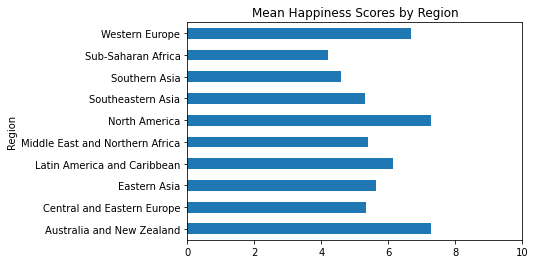

In [40]:
#can also use the pivot table to plot things
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region') #we exclude mean bc mean is default aggregation of pivot table
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

5.37573417721519


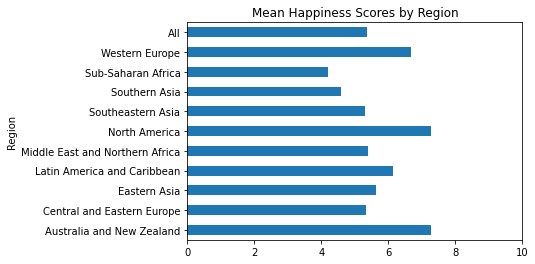

In [43]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', xlim=(0,10), title='Mean Happiness Scores by Region', legend=False) 
world_mean_happiness = happiness2015['Happiness Score'].mean()
print(world_mean_happiness) #notice that all category has the same mean as world_mean_happines

when we set the margins parameter equal to True, All will be added to the index of the resulting dataframe and the corresponding value will be the result of applying the aggregation method to the entire column. In our example, All is the mean of the Happiness Score column.

In [44]:
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


To apply multiple functions, we can pass a list of the functions into the aggfunc parameter:

In [45]:
happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)

,mean,amin,amax
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253


In [48]:
#Below, we aggregate both the 'Happiness Score' and 'Family' columns in happiness2015 and group by the 'Region' column:
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


In [49]:
#To apply multiple functions, we can pass a list of the functions into the aggfunc parameter:
happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)

,mean,amin,amax
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253


In [53]:
grouped = happiness2015.groupby('Region')
happy_family_stats = grouped[['Happiness Score', 'Family']].agg([np.min, np.max, np.mean])

pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region', aggfunc=[np.min, np.max, np.mean], margins=True)
print(happy_family_stats)
print(pv_happy_family_stats)

                                Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

<h1>Now we'll move onto Combining data when working with multiple datasets

In [153]:
happiness2015 = pd.read_csv("2015.csv")
happiness2016 = pd.read_csv('2016.csv')
happiness2017 = pd.read_csv('2017.csv')
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017
happiness2015.iloc[-1]

Country                                        Togo
Region                           Sub-Saharan Africa
Happiness Rank                                  158
Happiness Score                               2.839
Standard Error                              0.06727
Economy (GDP per Capita)                    0.20868
Family                                      0.13995
Health (Life Expectancy)                    0.28443
Freedom                                     0.36453
Trust (Government Corruption)               0.10731
Generosity                                  0.16681
Dystopia Residual                           1.56726
Year                                           2015
Name: 157, dtype: object

In [154]:
from Ipython import Image 
Image("Concat_Updated.svg")

ModuleNotFoundError: No module named 'Ipython'

#pd.concat function (not a method) - The concat() function combines dataframes one of two ways:

    Stacked: Axis = 0 (This is the default option.) - the dataframes add on top of each other so column indices merge and rows stack on each other
    axis = 1 - columns add side by side and rows are added side by side 

pass dataframes into a list of the concat function that you want to merge  

In [155]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)

question1 = len(concat_axis0.index) #number of rows
question2 = len(concat_axis1.index) #number of rows
print(concat_axis0.shape)
print(concat_axis1.shape)

(6, 3)
(3, 6)


In [156]:
#concatenating dfs of different shape
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
rows = len(concat_axis0.index)
columns = len(concat_axis0.columns)
print(concat_axis0) #basically adds the standard error column and then stacks the rows

   Year      Country  Happiness Score  Standard Error
0  2015  Switzerland            7.587         0.03411
1  2015      Iceland            7.561         0.04884
2  2015      Denmark            7.527         0.03328
3  2015       Norway            7.522         0.03880
0  2016      Denmark            7.526             NaN
1  2016  Switzerland            7.509             NaN
2  2016      Iceland            7.501             NaN


<h3> generally the concat function will keep ALL of the data, no matter if missing values are created.
    
If the indexes aren't meaningful, it can be better to reset them. This is especially true when we create duplicate indexes, because they could cause errors as we perform other data cleaning tasks.

Luckily, the concat function has a parameter, ignore_index, that can be used to clear the existing index and reset it in the result. Let's practice using it next.

In [157]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_update_index = pd.concat([head_2015, head_2016], axis=0, ignore_index=True)
print(concat_update_index) #fixes the index

   Year      Country  Happiness Score  Standard Error
0  2015  Switzerland            7.587         0.03411
1  2015      Iceland            7.561         0.04884
2  2015      Denmark            7.527         0.03328
3  2015       Norway            7.522         0.03880
4  2016      Denmark            7.526             NaN
5  2016  Switzerland            7.509             NaN
6  2016      Iceland            7.501             NaN


Merge function - combines axis horizontally (axis=1) - good for large datasets. With the merge() function, we'll combine dataframes on a key, a shared index or column.

In [158]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged = pd.merge(left=three_2015, right=three_2016, on='Country')
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


Notice that this did an inner join (intersection) of the two dfs, where it only showed norway bc norway was the only in both
This way of combining, or joining, data is called an inner join. An inner join returns only the intersection of the keys, or the elements that appear in both dataframes with a common key. 

There are actually four different types of joins:

    Inner: only includes elements that appear in both dataframes with a common key
    Outer: includes all data from both dataframes
    Left: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes
    Right: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes


In [159]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged_left = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
merged_left_updated = pd.merge(left=three_2016, right=three_2015, how='left', on='Country')
merged_left

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [160]:
merged_left_updated

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


In [161]:
#use suffixes parameter to make x = 2015 and y =2016
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country', suffixes=('_2015', '_2016'))
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country', suffixes=('_2016', '_2015'))
merged_suffixes

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [162]:
merged_updated_suffixes

,Country,Happiness Rank_2016,Year_2016,Happiness Rank_2015,Year_2015
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


<h2>Joining DataFrames on the index

Now that we have a good understanding of how to join dataframes on specific columns, let's look at another way to join dataframes - on the index.
Index

In this screen, we'll work with the following two subsets of happiness2015 and happiness2016:

four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]

	Country 	Happiness Rank 	Year
2 	Denmark 	3 	2015
3 	Norway 	4 	2015
4 	Canada 	5 	2015
5 	Finland 	6 	2015

three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

	Country 	Happiness Rank 	Year
2 	Iceland 	3 	2016
3 	Norway 	4 	2016
4 	Finland 	5 	2016

We'll join happiness2015 and happiness2016 on index using an inner join, so that the result contains only the elements in the key that appear in BOTH dataframes. First, though, let's make a prediction. How many rows and columns do you think the result will have? Write down your answer before you continue reading.

To join on the index, we'll set the left_index and right_index parameters to True:

pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'))

Below is the result:
	Country_2015 	Happiness Rank_2015 	Year_2015 	Country_2016 	Happiness Rank_2016 	Year_2016
2 	Denmark 	3 	2015 	Iceland 	3 	2016
3 	Norway 	4 	2015 	Norway 	4 	2016
4 	Canada 	5 	2015 	Finland 	5 	2016

Was your prediction correct? Based on our experience with joining on columns, you may have predicted the output would have just two rows, since only "Finland" and "Norway" appear in both dataframes. When we join on index, however, our result will contain only common indexes.
Join_index

Let's explore what happens when we join on index with a left join instead.

In [163]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))
merge_index_left = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'), how='left')

rows = len(merge_index_left.index)
columns = len(merge_index_left.columns)

<AxesSubplot:title={'center':'Mean Happiness Scores by Year'}, ylabel='Year'>

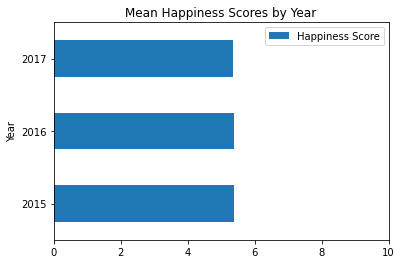

In [164]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

combined = pd.concat([happiness2015,happiness2016,happiness2017])
#merged = pd.merge()
pivot_table_combined = combined.pivot_table(values='Happiness Score', index='Year')
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10))

Let's summarize what we has been done:
	pd.concat() 	pd.merge()
Default Join Type 	Outer 	Inner
Can Combine More Than Two Dataframes at a Time? 	Yes 	No
Can Combine Dataframes Vertically
(axis=0) or Horizontally (axis=1)?
	Both 	Horizontally
Syntax 	Concat (Vertically)
concat([df1,df2,df3])

Concat (Horizontally)
concat([df1,df2,df3], axis = 1)



	Merge (Join on Columns)
merge(left = df1, right = df2, how = 'join_type', on = 'Col')

Merge (Join on Index)
merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True)



You may still be wondering about when to use each of the functions and methods we've learned. This table can help you understand the limitations of each, but that decision will mostly depend on the problem you're trying to solve.

Let's review our original question next:

Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

To answer this question, we'll create a bar plot in which each bar represented the mean happiness score for one of the years. We completed a similar task in the last mission when we calculated the mean happiness score for each region using the df.pivot_table() method:

#Use a pivot table to aggregate the data according to Region.

means = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=np.mean)

	Happiness Score
Region 	
Australia and New Zealand 	7.285000
Central and Eastern Europe 	5.332931
Eastern Asia 	5.626167
Latin America and Caribbean 	6.144682
Middle East and Northern Africa 	5.406900
North America 	7.273000
Southeastern Asia 	5.317444
Southern Asia 	4.580857
Sub-Saharan Africa 	4.202800
Western Europe 	6.689619

Then, we plotted the results with the df.plot() method.

#Use the `df.plot()` method to plot the results.

means.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10))

Mean_Happiness

Let's repeat the same steps, but this time, we'll group the data by the Year column. First, let's rename the Happiness.Score column so it matches the column name in happiness2015 and happiness2016:

happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

Next, we need to combine happiness2015, happiness2016, and happiness2017, so that we can group the result by the Year column.

<h3> df.append() and df.join() methods, which are basically shortcuts for the concat() and merge() functions. See here: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

<h2> Transforming Data with pandas 

Which of the factors above contribute the most to the happiness score?

However, in order to answer this question, we need to manipulate our data into a format that makes it easier to analyze. We'll explore the following functions and methods to perform this task:

    Series.map()
    Series.apply()
    DataFrame.applymap()
    DataFrame.apply()
    pd.melt()

Series.map() method - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html
Series.apply() method - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html
Both of these methods take in a function as a parameter and apply it element wise so one value at a time into the function

In [165]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }
happiness2015 = happiness2015.rename(mapping, axis=1)
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [166]:
#first convert these numbers to categories that indicate whether the factor has a high impact on the happiness score or a low impact
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

In [167]:
economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_apply = happiness2015['Economy'].apply(label)
equal = economy_impact_map.equals(economy_impact_apply)
equal

True

economy_impact_mapSeries.map() and Series.apply() methods and confirmed that both methods produce the same results.

In [168]:
economy_impact_apply #creates a series of the categories 

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

<h3> Method that can apply functions element-wise to multiple columns at once - the DataFrame.applymap() method.

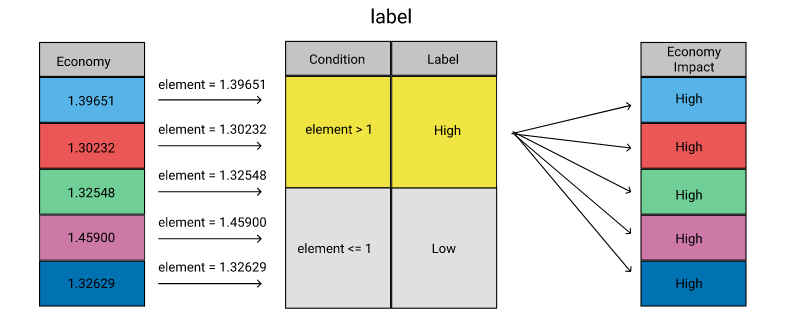

In [169]:
from IPython.display import Image 
Image(filename='label-map-apply-methods.png')

In [170]:
#apply method allows us to add an extra parameter 
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_impact_apply = happiness2015['Economy'].apply(label, x=0.8)

pandas already has a method that can apply functions element-wise to multiple columns at once 
- the DataFrame.applymap() method. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html

In [171]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_apply = happiness2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = happiness2015[factors].applymap(label)
factors_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


You can also use the apply() method on a dataframe, Instead of applying functions element-wise, the df.apply() method applies functions along an axis, either column-wise or row-wise. we create a function to use with df.apply(), we set it up to accept a series, most commonly a column. 

In [172]:
factors_impact.apply(pd.value_counts) #family and economy columns contain the highest values 

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


Value counts operates on a series not element which is why this works. 

In [178]:
#created a function that calculates the percentage of 'High' and 'Low' values in each column and applied it to factors_impact:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num / den

v_counts_pct = factors_impact.apply(v_counts)
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


In [179]:
#Let's use the df.apply() method to convert each of the values in the six factor columns and the Dystopia Residual column to percentages.
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div = col / happiness2015['Happiness Score']
    return div*100

factor_percentages = happiness2015[factors].apply(percentages)
factor_percentages

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445
...,...,...,...,...,...,...,...
153,6.409235,22.329004,12.370563,17.085426,15.928139,6.530447,19.348341
154,8.582335,10.594611,9.553892,14.505988,2.398204,5.467066,48.900599
155,22.062542,15.798071,24.016301,5.217565,6.289421,15.694943,10.930805
156,0.526678,14.315663,7.709466,4.079174,3.463683,6.790706,63.098795


Easier to convert these numbers into percentages, plot the results, and perform other data analysis tasks if we first reshaped the dataframe so that one column holds the values for all six factors and the Dystopia Residual column. Use the melt: https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.melt.html

In [180]:
#reshape happiness2015, The columns listed in factors should be transformed into rows. the main cols should stay the same
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)
melt['Percentage'] = round((melt['value']/melt['Happiness Score'])*100, 2)
melt

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86
...,...,...,...,...,...,...,...
1101,Rwanda,Sub-Saharan Africa,154,3.465,Dystopia Residual,0.67042,19.35
1102,Benin,Sub-Saharan Africa,155,3.340,Dystopia Residual,1.63328,48.90
1103,Syria,Middle East and Northern Africa,156,3.006,Dystopia Residual,0.32858,10.93
1104,Burundi,Sub-Saharan Africa,157,2.905,Dystopia Residual,1.83302,63.10


<h3>the melt function reshapes our data so that we could use vectorized operations to convert the value column into percentages.

<AxesSubplot:ylabel='value'>

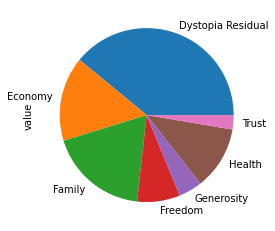

In [181]:
melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

pv_melt = melt.pivot_table(index='variable', values='value')
pv_melt.plot(kind='pie', y='value', legend=False)

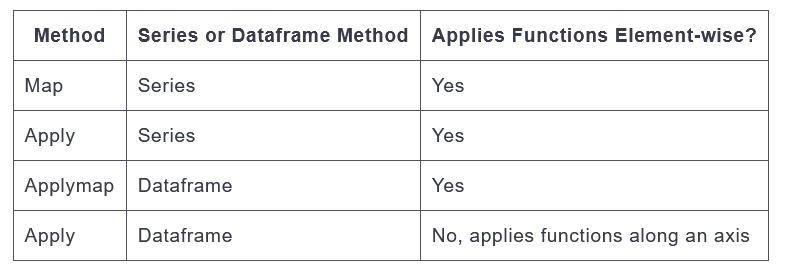

In [182]:
Image(filename='transform-methods.png')

<h3>You'll also find that pandas has a method to "un-melt" the data, or transform rows into columns. This method is called the df.pivot() method, not to be confused with the df.pivot_table() method used to aggregate data. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html

<h2>Working with strings 

In [231]:
world_dev = pd.read_csv("Country.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country', right_on='ShortName')
merged = merged.rename(col_renaming, axis=1)
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


In [232]:
#change the currency column so that it only shows franc for example
def extract_last_word(element):
    words = str(element).split()
    return words[-1]

merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)
merged['Currency Apply'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

In [233]:
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0,franc
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0,krona
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0,krone
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0,krone
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar


<h3> Vectorized equuivalent of the split.string method from pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html 
    

<h4> Method 	Description<h4>
<li>Series.str.split() 	Splits each element in the Series.<li/>
<li>Series.str.strip() 	Strips whitespace from each string in the Series.<li/>
<li>Series.str.lower() 	Converts strings in the Series to lowercase.<li/>
<li>Series.str.upper() 	Converts strings in the Series to uppercase.<li/>
<li>Series.str.get() 	Retrieves the ith element of each element in the Series. <li/>
<li>Series.str.replace() 	Replaces a regex or string in the Series with another string.<li/>
<li>Series.str.cat() 	Concatenates strings in a Series.<li/>
<li>Series.str.extract() 	Extracts substrings from the Series matching a regex pattern.<li/>

In [234]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)

merged['Currency Vectorized'].head(5)

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

This should be the correct version

In [235]:
#this method inlcudes the count of chars on NaNs
def val_counts(element):
    return len(str(element))
merged['CurrencyUnit'].apply(val_counts)

0      11
1      13
2      12
3      15
4      15
       ..
153    13
154    22
155     3
156    13
157    22
Name: CurrencyUnit, Length: 158, dtype: int64

In [236]:
#this method drops the NaNs and does not include them
lengths = merged['CurrencyUnit'].str.len()
value_counts = lengths.value_counts(ascending=True,dropna=False)
value_counts

20.0     1
23.0     1
26.0     1
39.0     1
10.0     1
9.0      2
19.0     3
25.0     5
22.0     7
11.0     8
17.0     9
18.0     9
16.0    12
15.0    13
NaN     13
13.0    14
12.0    17
4.0     20
14.0    21
Name: CurrencyUnit, dtype: int64

In [237]:
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(pattern)
national_accounts.head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4     True
5    False
6    False
7     True
8     True
9     True
Name: SpecialNotes, dtype: object

In [238]:
national_accounts = merged['SpecialNotes'].str.contains(pattern, na=False)
merged_national_accounts = merged[national_accounts]
merged_national_accounts.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


In [239]:
pattern = r'([1-2][0-9][0-9][0-9])'
merged['SpecialNotes'].str.extract(pattern)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
153,2006
154,NaN
155,NaN
156,NaN


In [240]:
#A pattern with one group will return a Series if expand=False.
pattern = r'([1-2][0-9][0-9][0-9])'
merged['SpecialNotes'].str.extract(pattern, expand=False).head(15)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5     1999
6     1999
7      NaN
8      NaN
9     1990
10    2010
11     NaN
12    1999
13    2008
14     NaN
Name: SpecialNotes, dtype: object

In [241]:
#A pattern with one group will return a DataFrame with one column if expand=True.
pattern = r'([1-2][0-9][0-9][0-9])'
merged['SpecialNotes'].str.extract(pattern, expand=True).head(10)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,1999
6,1999
7,NaN
8,NaN
9,1990


In [242]:
merged = merged.set_index('SpecialNotes')
merged

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
SpecialNotes,,,,,,,,,,,,,,,,,,,,,
NaN,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0,franc,franc
NaN,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0,krona,krona
NaN,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0,krone,krone
NaN,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0,krone,krone
Fiscal year end: March 31; reporting period for national accounts data: CY.,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Based on official government statistics, national accounts data are revised for 2006 onward; the new base year is 2011. Rwanda reports using SNA 2008.",Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,...,2012,"Malaria Indicator Survey (MIS), 2013","Integrated household survey (IHS), 2010/11",NaN,2008,NaN,2013.0,2000.0,franc,franc
NaN,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,...,2013,"Multiple Indicator Cluster Survey (MICS), 2014",Core Welfare Indicator Questionnaire Survey (C...,NaN,2011/12,NaN,2013.0,2001.0,franc,franc
NaN,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN
